# Handling Missing Data

In this project, I demonstrate some methods for hangling missing data. The dataset I use in this project is from Stack Overflow's developer survey. The data and project outline was provided by Codecademy.

## Basic Exploratory Data Analysis

There are several things we want to do before diving into questions about the dataset's variables. We need to:

1. Load the data
2. Inspect the columns
3. Inspect the head
4. Get the row count for each variable
5. Run simple summary stats using .describe()

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the data
df= pd.read_csv('developer_dataset.csv')
# a warning results from this statement due to mixed typing in columns 18-20. These columns are later deleted.

C:\Users\caccu\AppData\Local\Temp\ipykernel_9712\1782012707.py:2: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('developer_dataset.csv')


In [3]:
# inspect the columns
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


In [4]:
# inspect the head
print(df.head())

   RespondentID  Year        Country          Employment  \
0             1  2018  United States  Employed full-time   
1             1  2019  United States  Employed full-time   
2             1  2020  United States  Employed full-time   
3             2  2018  United States  Employed full-time   
4             2  2019  United States  Employed full-time   

                                      UndergradMajor  \
0  Computer science, computer engineering, or sof...   
1  Computer science, computer engineering, or sof...   
2  Computer science, computer engineering, or sof...   
3  Computer science, computer engineering, or sof...   
4  Computer science, computer engineering, or sof...   

                                             DevType  \
0           Engineering manager;Full-stack developer   
1                              Developer, full-stack   
2                                                NaN   
3                               Full-stack developer   
4  Data or business an

In [5]:
# get the row count
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

We can see that many of the columns are missing data points. The "missingness" of data in these columns will inform how we clean, delete, and/or analyze data later.

In [6]:
# run simple summary stats
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


Looking at the simple summary stats, we can see that there are some issues with outliers, such as 475 as the max value for WorkWeekHrs (there are only 168 hours in a week). Looking at that same column, we can see that the vast majority of developers work about 40 hours a week (25th perc. is 40hrs, 75th perc. is only 42hrs).

## Delete Columns with "Too Much" Missing Data

Working with columns that are missing too much data may adversely affect the validity of analyses performed on those columns. Generally, columns missing over 60% of their data are appropriate candidates for deletion. In order to determine what percentage of the data is missing for each column we can run the following code.

In [7]:
# get the max value (complete column)
max_value= df['RespondentID'].count()

# get percent missing data for each column
raw_percent= (1 - df.count() / max_value) * 100
print(round(raw_percent, 2))

RespondentID               0.00
Year                       0.00
Country                    0.00
Employment                 1.60
UndergradMajor            11.47
DevType                    9.69
LanguageWorkedWith         8.26
LanguageDesireNextYear    13.64
DatabaseWorkedWith        22.79
DatabaseDesireNextYear    33.25
PlatformWorkedWith        17.62
PlatformDesireNextYear    23.23
Hobbyist                  38.54
OrgSize                   50.72
YearsCodePro              14.76
JobSeek                   45.55
ConvertedComp             17.87
WorkWeekHrs               54.06
NEWJobHunt                82.80
NEWJobHuntResearch        83.20
NEWLearn                  78.22
dtype: float64


It is clear that the columns prefixed by NEW are missing substantial amounts of data, so we will drop these columns.

In [8]:
cols_to_drop= ['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn']
df.drop(cols_to_drop,
       axis=1,
       inplace=True)

## Examine Employment by Country

We will start off with a column that isn't missing too much data, the Employment column. We want to see if the missing data (only 1.6%) seems to be missing for a predictable reason (MAR - missing at random), or missing completely at random (MCAR). We can assume the data is MCAR if the amount of missing data is roughly proportional to the number of responses received.

Let's plot the count of RespondentID by Country.

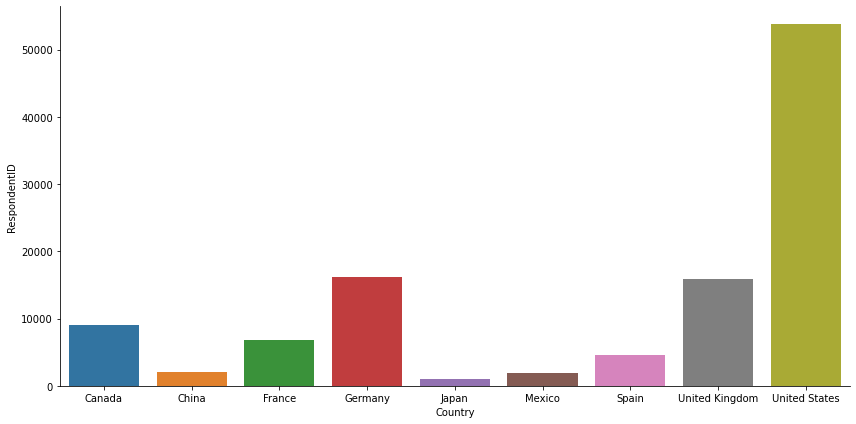

<Figure size 432x288 with 0 Axes>

In [9]:
df1= df[['RespondentID','Country']].groupby('Country', as_index=False).count()
# print(df1)

resp_by_country= sns.catplot(data=df1,
                            kind='bar',
                            x='Country',
                            y='RespondentID',
                            height=6,
                            aspect=2)
plt.show()
plt.clf()

Next we plot the number of *missing* Employment datapoints by country. Ideally, this plot will look proportionally similar to the plot we just created. If this is the case, we can use pairwise deletion to eliminate rows missing values for Employment.

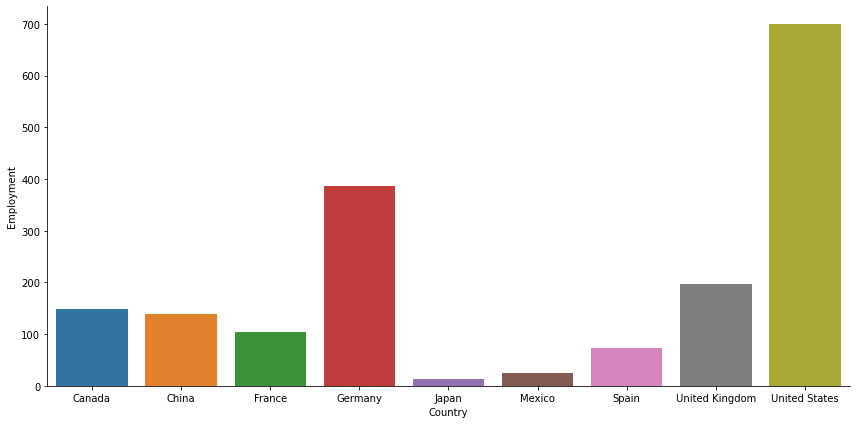

<Figure size 432x288 with 0 Axes>

In [10]:
df2= df['Employment'].isnull().groupby(df['Country']).sum().reset_index()

missing_empl_by_country= sns.catplot(data=df2,
                                    kind='bar',
                                    x='Country',
                                    y='Employment',
                                    height=6,
                                    aspect=2)
plt.show()
plt.clf()

Because the bar chart of missing values for Employment is roughly proportional to our plot of respondent counts, we can consider the missing Employment data MCAR. To drop the rows missing Employment data, we can use .dropna() with a subset.

In [11]:
# drop rows missing Employment data
df.dropna(subset=['Employment'],
         inplace=True,
         how='any')

# print(df['Employment'].isna().sum())

Now that we have dropped rows that are missing Employment data, we can begin to analyze the relationship between types of Employment and Country. To see what the various categories of Employment are, we can print out the unique values:

In [12]:
print(df['Employment'].unique())

['Employed full-time' 'Employed part-time'
 'Not employed, but looking for work' 'Student'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work' 'Retired']


We generate a figure that plots the various Employment categories by country. This will generate seven bar charts since there are seven unique categories in the Employment column.

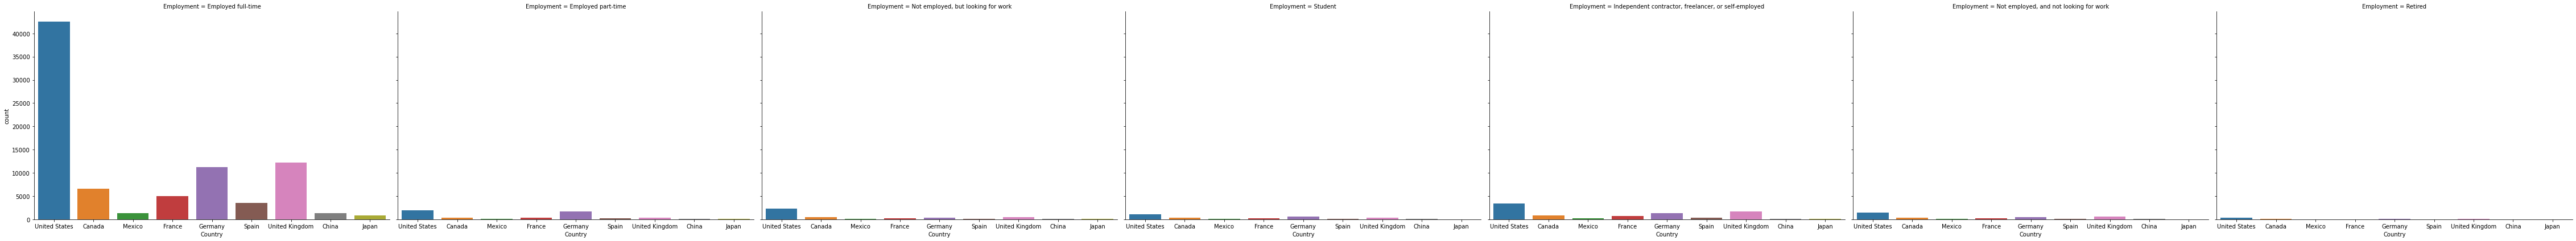

<Figure size 432x288 with 0 Axes>

In [13]:
fig_empl_by_country= sns.catplot(x="Country",
                                 col="Employment", # organizes plots by categoricals in Employment (of which there are 7)
                                 data=df,
                                 kind="count",
                                 height=6,
                                 aspect=1.5)
plt.show()
plt.clf() 

The fact that the vast majority of survey respondents are employed full-time indicates that the data most strongly reflect the preferences of this group. If a client is interested in what developers look for in a job, the analysis of this data will be relevant. To get a better view of the count of full-time employees by country, we can plot the bar chart below:

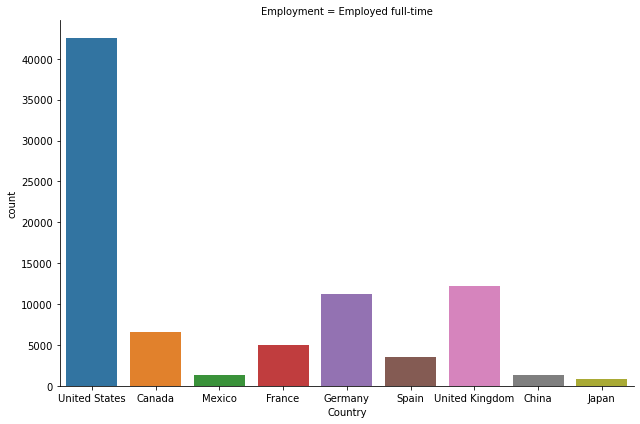

<Figure size 432x288 with 0 Axes>

In [14]:
# plot full-time count by country
fig_full_by_country= sns.catplot(x="Country",
                                 col="Employment",
                                 data=df[df['Employment']=='Employed full-time'],
                                 kind="count",
                                 height=6,
                                 aspect=1.5)
plt.show()
plt.clf()

## Investigating the Distribution of Undergrad Majors

We recall that the UndergradMajor column is missing about 11% of datapoints across all countries. If we plot the count of missing values by year, we see that all values for the year 2020 are filled in. In this case, we can sort the DataFrame values by RespondentID and Year, and then backfill the values / perform NOCB (Next Observation Carried Backwards).

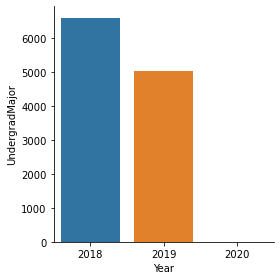

<Figure size 432x288 with 0 Axes>

In [15]:
# show that the year 2020 is not missing any data for UndergradMajor
missing_unde = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()
 
sns.catplot(x="Year", 
            y="UndergradMajor",
            data=missing_unde, 
            kind="bar",
            height=4,
            aspect=1);
plt.show()
plt.clf()

In [16]:
# sort data by RespondentID and then Year
df= df.sort_values(['RespondentID','Year'])

# backfill UndergradMajor data
df['UndergradMajor'].bfill(axis=0, inplace=True)

Next, we isolate the Year and UndergradMajor columns in a new DataFrame, and drop any NaN's that were not backfilled.

In [17]:
unde_df= df[['Year','UndergradMajor']]
unde_df= unde_df.dropna()

We now add a column for each major area and set the row value to True if the major area is present.

In [18]:
unde_df.loc[unde_df['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
unde_df.loc[unde_df['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
unde_df.loc[unde_df['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
unde_df.loc[unde_df['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
unde_df.loc[unde_df['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
unde_df.loc[unde_df['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

We then melt the DataFrame and group the values by year and major.

In [19]:
unde_df= unde_df.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='Major',
    value_name='Count')

In [20]:
unde_df.dropna(how='any', inplace=True)
unde_df= unde_df.groupby(['Year','Major']).count().reset_index()
print(unde_df.head(10))

   Year           Major  Count
0  2018          ComSci  26521
1  2018  NaturalScience   2282
2  2018         NoMajor    510
3  2018        OtherEng   3275
4  2018   SocialScience   1168
5  2019          ComSci  26384
6  2019  NaturalScience   2293
7  2019         NoMajor    582
8  2019        OtherEng   3010
9  2019   SocialScience   1072


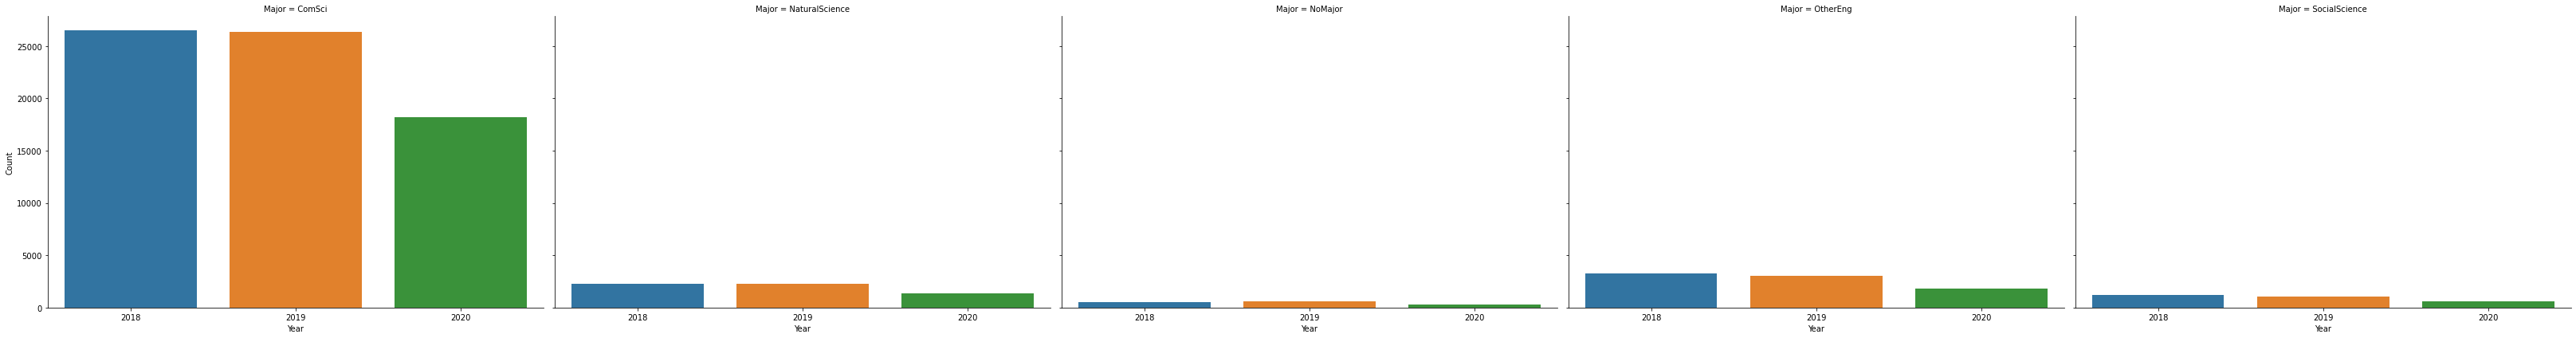

<Figure size 432x288 with 0 Axes>

In [21]:
fig_major= sns.catplot(x="Year", y='Count', col="Major",
                data=unde_df, kind="bar",
                height=6, aspect=1.5)
plt.show()
plt.clf()

We can see from the bar charts that the vast majority of developers majored in computer science-related field, although the numbers drop off by a significant amount in 2020, indicating that developers from non-computer science backgrounds may be making their way into the developer career. This suggests some people have pursued an education path other than computer science, but still found a job in a developer role.

## Understanding the Relationship between Experience and Compensation

In order to investigate the relationship between experience and compensation, we can first create boxplots to show the range of years of experience (YearsCodePro) and compensation (ConvertedComp).

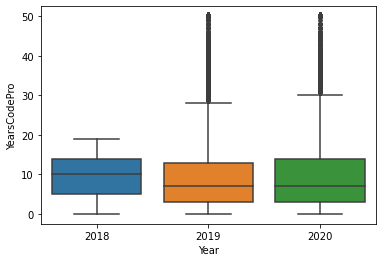

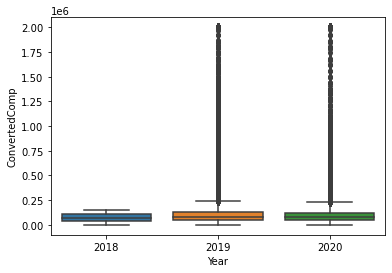

<Figure size 432x288 with 0 Axes>

In [22]:
df4 = df[['Year','YearsCodePro','ConvertedComp']]
 
experience= sns.boxplot(x="Year", y="YearsCodePro",
            data=df4)
plt.show()
plt.clf()
 
compensation= sns.boxplot(x="Year", y="ConvertedComp",
            data=df4)
plt.show()
plt.clf()

Although there are outliers in the data, the variables seem to correlate with one another. Because of this correlation, we can fill in the missing values for these columns using Multiple Imputation.

In [23]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [24]:
# isolate columns of interest
df_toimpute= df[['YearsCodePro','ConvertedComp']]
 
# assign a test DataFrame
traindf, testdf= train_test_split(df_toimpute, train_size=0.1)
 
# create model, iterates 20 times
imp= IterativeImputer(max_iter=20, random_state=0)
 
# fit the model
imp.fit(df_toimpute)
 
# transform the model on the entire dataset
comp_by_exp= pd.DataFrame(np.round(imp.transform(df_toimpute), 0), columns=['YearsCodePro','ConvertedComp'])

Before we create our boxplot, we need to modify our comp_by_exp DataFrame to eliminate outliers and discretize the bins for years of experience.

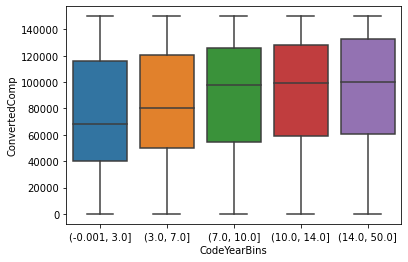

<Figure size 432x288 with 0 Axes>

In [25]:
comp_by_exp= comp_by_exp.loc[comp_by_exp['ConvertedComp'] <= 150000]
comp_by_exp['CodeYearBins']= pd.qcut(comp_by_exp['YearsCodePro'], q=5)
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=comp_by_exp)
plt.show()
plt.clf()

The resulting boxplot is a beautiful visual that illustrates the positive correlative relationship between compensation and experience!